## Fake vs Real News

### Import libraries

In [1]:
import pandas as pd # data processing 
import matplotlib.pyplot as plt # plotting 
import numpy as np # linear algebra 
import seaborn as sns 

# tool to read data csv file (it is faster than pandas and can read files from .zip)
import datatable as dt

# import kaggle

# colored output text
from termcolor import colored

import re
import string 

from bs4 import BeautifulSoup

from wordcloud import WordCloud, STOPWORDS

# Silent warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Install kaggle library

In [ ]:
# !pip install kaggle

### Add credentials used for Kaggle API

In [64]:
# # try in bash (if not working in Jupyter) create folder .kaggle and copy kaggle.json (kaggle api key) to it
# !mkdir ~/.kaggle
# !cp ~/Downloads/kaggle.json ~/.kaggle/kaggle.json

### Search for datasets

In [ ]:
# search for the dataset
# !kaggle datasets list -s 'fake-news'

### Dowload datasets

In [ ]:
# # https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv
# !kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

### Create folder for datasets
#### Move dataset to data directory

In [65]:
# !mkdir data
# !mv fake-and-real-news-dataset.zip data

### Dataset in use 
### https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

In [2]:
fake_df1 = dt.fread('data/fake-and-real-news-dataset.zip/Fake.csv').to_pandas()
real_df1 = dt.fread('data/fake-and-real-news-dataset.zip/True.csv').to_pandas()

### Quick exploratory analysis of Fake News DF

In [3]:
fake_df1.head(6)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While ...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"


In [4]:
fake_df1.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17453,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,630,9050,46


In [5]:
fake_df1.shape

(23481, 4)

In [6]:
fake_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [7]:
fake_df1.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

#### Let's find and remove duplicates in Fake DF

In [8]:
duplicate = fake_df1['text'][fake_df1['text'].duplicated()].index
result = f"Found {len(duplicate)} duplicate in {fake_df1.shape[0]} samples"
print(colored(result, 'blue', attrs=['bold']))


Found 6028 duplicate in 23481 samples


In [9]:
# remove duplicates 

fake_df1.drop(index=duplicate, inplace=True)

fake_df1.shape

(17453, 4)

In [10]:
fake_df1['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News'],
      dtype=object)

### Quick explanatory analysis of Real News DF

In [11]:
real_df1.head(6)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"


In [12]:
real_df1.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20825,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [13]:
real_df1.shape

(21417, 4)

In [14]:
real_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [15]:
real_df1.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

#### Let's Find and remove duplicates in Real DF

In [16]:
duplicate = real_df1['text'][real_df1['text'].duplicated()].index
result = f"Found {len(duplicate)} duplicate in {real_df1.shape[0]} samples"
print(colored(result, 'blue', attrs=['bold']))

Found 225 duplicate in 21417 samples


In [17]:
real_df1.drop(index=duplicate, inplace=True)

real_df1.shape

(21192, 4)

In [18]:
real_df1['subject'].value_counts()

politicsNews    11214
worldnews        9978
Name: subject, dtype: int64

### Let's add 'true' label for easier reference where Fake = 0, Real = 1

In [19]:
# label the diff df for easier ref

fake_df1['true'] = 0
real_df1['true'] = 1

# print new shape 
print(fake_df1.shape)
print(real_df1.shape)

(17453, 5)
(21192, 5)


In [20]:
# just to see 

real_df1.describe

<bound method NDFrame.describe of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reut

In [21]:
# concat the two datasets  

raw_df = pd.concat([fake_df1, real_df1], ignore_index = True)
raw_df

,title,text,subject,date,true
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name ...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
38640,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
38641,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
38642,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
38643,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [22]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38645 entries, 0 to 38644
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38645 non-null  object
 1   text     38645 non-null  object
 2   subject  38645 non-null  object
 3   date     38645 non-null  object
 4   true     38645 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [23]:
# How many are real, and how many are fake? 

raw_df.true.value_counts()

1    21192
0    17453
Name: true, dtype: int64

### Let's visualise raw_df before any cleaning to allow comparison 

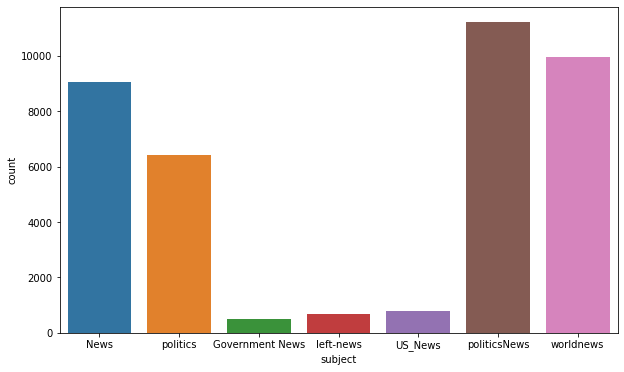

In [24]:
# spread of information sources/ subjects in raw df 

plt.figure(figsize=(10,6))
sns.countplot('subject', data = raw_df)
plt.show()

In [25]:
# number of samples grouped by subject
raw_df.groupby('subject')['true'].count()

subject
Government News      514
News                9050
US_News              783
left-news            683
politics            6423
politicsNews       11214
worldnews           9978
Name: true, dtype: int64

Text(0.5, 1.0, 'Breakdown of Fake Vs Real News in Dataset')

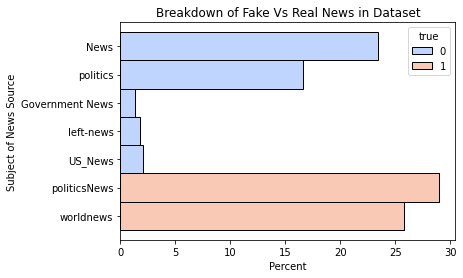

In [26]:
# plot the grouped with seaborn and matplotlib
sns.histplot(raw_df, y='subject', hue ='true', 
             stat = 'percent', multiple = 'stack',
             palette = 'coolwarm')
plt.ylabel('Subject of News Source')
plt.title('Breakdown of Fake Vs Real News in Dataset')

#### Let's change politicsNews to politics, News to worldnews and plot again
#### This allows easier comparison of news subject for fake and real news 

Text(0.5, 1.0, 'Breakdown of Fake Vs Real News in Dataset')

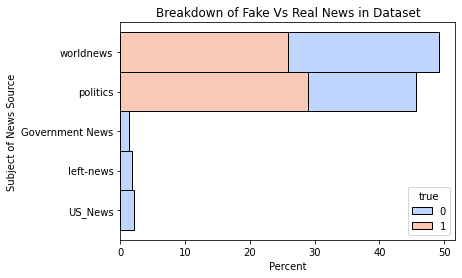

In [27]:
raw_df['subject'].replace({'politicsNews':'politics', 
                           'News':'worldnews'}, inplace = True)

sns.histplot(raw_df, y='subject', hue ='true', 
           stat = 'percent', multiple = 'stack',
           palette = 'coolwarm')
plt.ylabel('Subject of News Source')
plt.title('Breakdown of Fake Vs Real News in Dataset')

#### Let's make a word cloud of the text for quick comparison of article content before cleaning and processing. 


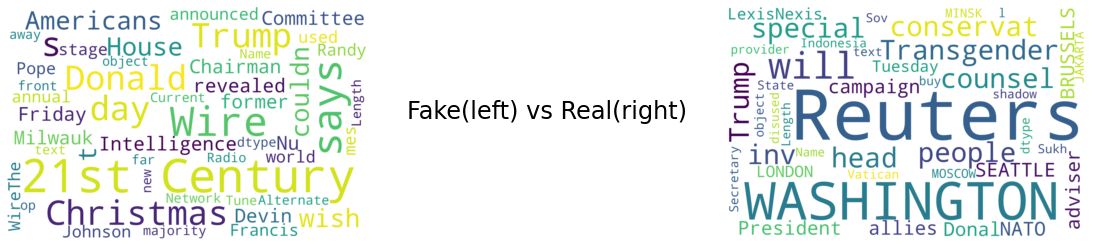

In [28]:
fake_text = raw_df.text[raw_df['true']==0]
real_text = raw_df.text[raw_df['true']==1]

def plot_fake_vs_real(fake, real):
    wordcloud_fake = WordCloud(width = 2000, height = 1300,
                              background_color = 'white', 
                              stopwords = STOPWORDS).generate(str(fake))
    wordcloud_real = WordCloud(width = 2000, height = 1300,
                              background_color = 'white', 
                              stopwords = STOPWORDS).generate(str(real))
    
    # plot WordCloud img 
    plt.subplots(figsize=(15,6))
    
    plt.subplot(1,3,1)
    plt.imshow(wordcloud_fake, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    
    plt.suptitle("Fake(left) vs Real(right)", y=0.5, va='center', size = 24)
    
    plt.subplot(1,3,3)
    plt.imshow(wordcloud_real, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)

    
plot_fake_vs_real(fake_text, real_text)
plt.show()      

#### Let's add a wordcloud of title words too, to show what words are used as click / read-bait

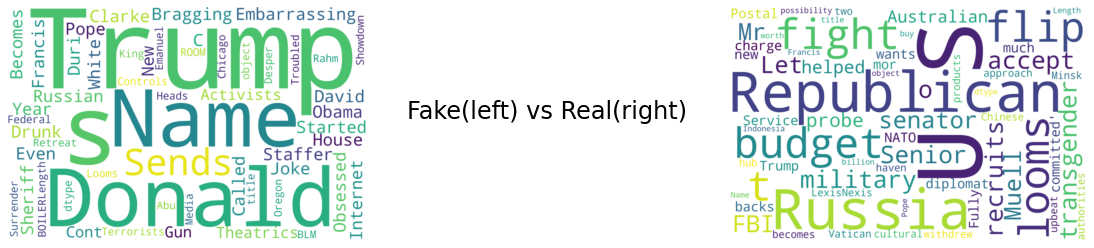

In [29]:
fake_title = raw_df.title[raw_df['true']==0]
real_title = raw_df.title[raw_df['true']==1]

plot_fake_vs_real(fake_title, real_title)
plt.show()

## Data Cleaning 

Df needs cleaning. Ultimate Goal is:  
* Check for null values
* check for empty spaces 
* check for nonsense texts 
* remove urls, https, special characters, numbers 
* remove REUTERS()


In [30]:
# check raw_df starting point
raw_df.shape

(38645, 5)

In [31]:
# check null values
raw_df.isnull().sum()

title      0
text       0
subject    0
date       0
true       0
dtype: int64

In [32]:
# how many have <CITY>(Reuters) pattern in text 
# pattern = 0+ uppercase letters, 0 or 1 spaces, (Reuters)

pattern = r'[A-Z]* ?\(Reuters\)'

test_df = raw_df['text'].copy().to_frame()
test_df['patterns'] = test_df['text'].map(lambda x: len(re.findall(pattern, x)))

result = f"{test_df.groupby('patterns')['text'].count()[1]} of {raw_df.shape[0]} samples have <City> (REUTERS) pattern."
print(colored(result, 'blue', attrs=['bold']))

21028 of 38645 samples have <City> (REUTERS) pattern.


In [33]:
# remove pattern <CITY> (Reuters)

raw_df['text'] = raw_df['text'].map(lambda x: re.sub(pattern, '', x))

In [34]:
raw_df.sample(10)

,title,text,subject,date,true
35267,"As Johnson Sirleaf exits, Liberians thankful f...",- After a dozen years of recovery under Ellen...,worldnews,"October 8, 2017",1
7669,Is Trump EMBRACING HITLER? Has Thousands Of Fo...,What the HELL just happened in Orlando? Donald...,worldnews,"March 5, 2016",0
31193,Saudi Crown Prince calls Iran leader 'new Hitl...,- Saudi Arabia s powerful Crown Prince called...,worldnews,"November 24, 2017",1
14849,(VIDEO) YOU’LL BE SHOCKED AT HOW LITTLE PEOPLE...,Nukes or No Nukes? This is crazy and people ha...,politics,"Sep 4, 2015",0
19951,"Carter blasts Trump's ban on transgender, says...","- Ash Carter, who was U.S. defense secretary ...",politics,"July 26, 2017",1
33743,Turkey court releases eight activists on bail ...,- A Turkish court on Wednesday ordered the re...,worldnews,"October 25, 2017",1
31954,Lebanon's Hariri accepts invitation to come to...,- Lebanon s Saad al-Hariri has accepted an in...,worldnews,"November 16, 2017",1
46,BREAKING: Michael Flynn CRACKS – Will Testify ...,"Michael Flynn, Trump s embattled former nation...",worldnews,"December 1, 2017",0
24959,Fate of Obama legacy initiatives in hands of c...,- When President Barack Obama leaves office o...,politics,"November 5, 2016",1
7158,‘Earthquake Election’ Destroying GOP Predicted...,For months concerns have been expressed about ...,worldnews,"April 1, 2016",0


In [35]:
raw_df.describe(include='all')

,title,text,subject,date,true
count,38645,38645,38645,38645,38645.000000
unique,38268,38644,5,2397,NaN
top,Factbox: Trump fills top jobs for his administ...,,worldnews,"December 6, 2017",NaN
freq,14,2,19028,166,NaN
mean,NaN,NaN,NaN,NaN,0.548376
std,NaN,NaN,NaN,NaN,0.497661
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000


In [36]:
# Check for empty rows 

raw_df[raw_df['text'].str.strip()=='']

,title,text,subject,date,true
10920,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017",0
26373,Graphic: Supreme Court roundup,,politics,"June 16, 2016",1


In [37]:
# drop the above empty rows 

raw_df = raw_df[raw_df['text'].str.strip()!='']
raw_df.shape

(38643, 5)

### Run below just to double check no empty once more 

In [38]:
# check for empty rows and list them
#  note 631 empty values 

empty = [index for index, text in enumerate(raw_df.text.values) if str(text).strip()=='']
print(f"Number of empty rows: {len(empty)}")
raw_df.iloc[empty].tail()

Number of empty rows: 0


,title,text,subject,date,true


#### Confirm dropped unecessary rows. 

In [39]:
# text has bool true so should return false if empty 
# just another way to check for null values 
# note DF length matches above with 38644 rows

all(raw_df['text'].astype(bool))

True

### Expand into day, month, year

In [40]:
# date -> datetime

def get_day_mon_yr(date):
    try: 
        return pd.to_datetime(date, infer_datetime_format = True)
    except:
        return np.nan
    
raw_df['Date'] = raw_df.apply(lambda row: get_day_mon_yr(row['date']), axis = 1)
raw_df.sample(5)

,title,text,subject,date,true,Date
4677,Bakari Sellers: Not All Trump Supporters Are B...,Political analyst Bakari Sellers appeared on C...,worldnews,"September 11, 2016",0,2016-09-11
15893,SEATTLE MAYOR WANTS TO HELP MUSLIMS FOLLOW SHA...,No word yet about the Mayor developing a plan ...,Government News,"Jul 17, 2015",0,2015-07-17
29130,Thailand seeks air safety rating upgrade by U....,- Thailand aims to get its air safety rating ...,worldnews,"December 20, 2017",1,2017-12-20
2316,Trump’s LOST HIS DAMN MIND Making RIDICULOUS D...,If you re not paying attention to Donald Trump...,worldnews,"March 3, 2017",0,2017-03-03
37807,Hurricane Irma thrives on fateful mix of 'idea...,"- Hurricane Irma, a deadly, devastating force...",worldnews,"September 9, 2017",1,2017-09-09


In [41]:
# check null values (none expected)

raw_df.isnull().sum()

title      0
text       0
subject    0
date       0
true       0
Date       6
dtype: int64

In [42]:
# check where Date is NaN

raw_df[raw_df['Date'].isna()]

,title,text,subject,date,true,Date
9357,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,0,NaT
15119,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,0,NaT
15120,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,0,NaT
15422,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
15423,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,0,NaT
16126,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...,0,NaT


In [43]:
raw_df.shape

(38643, 6)

In [44]:
# drop the NaN values 

raw_df.dropna(inplace=True)
print(raw_df.shape)
raw_df.sample(5)

(38637, 6)


,title,text,subject,date,true,Date
10814,D.C. BAR OWNER Where Seth Rich Was Last Seen D...,"Last week, Private Investigator Rod Wheeler ap...",politics,"May 22, 2017",0,2017-05-22
25864,Obama warns Democrats against overconfidence a...,"CHILMARK, Mass. - Declaring he was tired of ta...",politics,"August 16, 2016",1,2016-08-16
35981,"Uber, Grab to tighten up on deliveries in Phil...",- Ride-hailing platforms Uber [UBER.UL] and G...,worldnews,"September 29, 2017",1,2017-09-29
15543,STUNNING: First Lady Melania Trump Welcomes Is...,President Trump and Prime Minister Netanyahu ...,Government News,"Feb 15, 2017",0,2017-02-15
22349,Trump calls court decision blocking revised tr...,"NASHVILLE, Tenn. - U.S. President Donald Trump...",politics,"March 16, 2017",1,2017-03-16


In [45]:
# Add cols for day, month, year 

raw_df['day']= raw_df.apply(lambda row: row['Date'].day, axis=1)
raw_df['month']= raw_df.apply(lambda row: row['Date'].month, axis =1)
raw_df['year']= raw_df.apply(lambda row: row['Date'].year, axis = 1)

# drop redundant date cols
raw_df.drop(['date','Date'], axis=1, inplace=True)
raw_df.sample(3)

,title,text,subject,true,day,month,year
3977,JUST IN: Republicans In Florida Are Giving One...,What many people have been predicting througho...,worldnews,0,1,11,2016
37778,Togo must introduce two-term limit swiftly to ...,- Togo must go the way of other West African ...,worldnews,1,9,9,2017
37428,"Juncker wants EU finance minister, no separate...","STRASBOURG, France - The European Union should...",worldnews,1,13,9,2017


#### Let's plot the correlation between date and target 

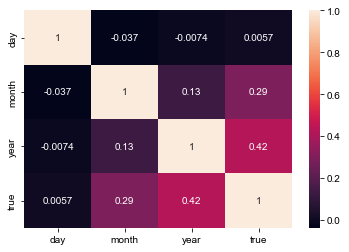

In [46]:
sns.heatmap(raw_df[['day', 'month', 'year', 'true']].corr(), annot=True)
sns.set(rc={'figure.figsize':(10,6)})

### Check links in text/ instead of text

In [47]:
# start with http, ? mean 0 or one s (https), ://, [^\n ]* any character except: '\n' (newline), ' ' (0 or more times)
pattern = r'https?://[^\n ]*'

# find how many samples have links in text
test_df = raw_df['text'].copy().to_frame()
test_df['patterns'] = test_df['text'].map(lambda x: len(re.findall(pattern, x)))

text = f"{test_df.groupby('patterns')['text'].count()[1]} of {raw_df.shape[0]} samples have link"
print(colored(text, 'blue', attrs=['bold']))

1900 of 38637 samples have link


In [48]:
# remove link
raw_df['text'] = raw_df['text'].map(lambda x: re.sub(pattern, '', x))

In [49]:
# check how many strings had just link in text column
text = f"{raw_df.text[raw_df['text'].str.strip()==''].count()} samples had links instead of news text"
print(colored(text, 'blue', attrs=['bold']))

raw_df[raw_df['text'].str.strip()==''].sample(5)

48 samples had links instead of news text


,title,text,subject,true,day,month,year
12036,THE VIEW’S Whoopi Goldberg To Co-Host: “This I...,,politics,0,1,12,2016
11561,TOMI LAHREN Blasts The Left For Attacking Trum...,,politics,0,14,2,2017
11379,JUDGE JEANINE PIRRO’S TRUTH BOMB On Fired US A...,,politics,0,12,3,2017
11299,SARA CARTER WAS RIGHT ABOUT SPYING ON TRUMP! “...,,politics,0,23,3,2017
11982,TUCKER CARLSON DESTROYS Smug Elector Who Refus...,,politics,0,9,12,2016


In [50]:
# remove 48 samples without text
raw_df = raw_df[raw_df['text'].str.strip()!='']
raw_df.shape

(38589, 7)

### Unique chars in text 

#### Let's plot the length of unique characters in the text, and 'true-value'

In [51]:
# count unique alphabet characters in text of each article 

def unique_char_num(string): 
    lower_str = string.lower()
    alpha = re.sub(r'[^a-z]','',lower_str)
    unique_ch = set(list(alpha))
    n_unique_ch = len(unique_ch)
    return n_unique_ch 

temp_df = raw_df[['text', 'true']].copy()
temp_df['unique_char'] = temp_df.text.map(lambda x: unique_char_num(x))
temp_df.head()

,text,true,unique_char
0,Donald Trump just couldn t wish all Americans ...,0,25
1,House Intelligence Committee Chairman Devin Nu...,0,24
2,"On Friday, it was revealed that former Milwauk...",0,25
3,"On Christmas day, Donald Trump announced that ...",0,26
4,Pope Francis used his annual Christmas Day mes...,0,25


In [52]:
# sort into descending order by unique_char

to_plot = temp_df.sort_values(by='unique_char', ascending=False).reset_index()

# add text length col to DF 
to_plot['text_len']= to_plot.text.map(lambda x: len(x))
to_plot

,index,text,true,unique_char,text_len
0,9872,President Trump was right again! His campaign ...,0,26,2778
1,29326,- The Organization of American States (OAS) s...,1,26,3193
2,10111,Katie Couric s career has been pretty much in ...,0,26,1073
3,29340,"GWADAR, Pakistan - China is lavishing vast amo...",1,26,8620
4,17005,21st Century Wire says So much for caring abou...,0,26,3316
...,...,...,...,...,...
38584,11845,Via: WT,0,5,7
38585,12405,Via: GP,0,5,7
38586,11113,Enjoy:,0,5,6
38587,11890,Enjoy,0,5,5


<AxesSubplot:xlabel='text_len', ylabel='unique_char'>

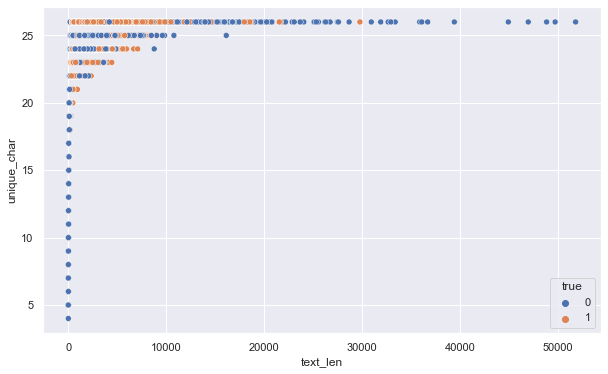

In [53]:
sns.scatterplot(data=to_plot, x='text_len', 
                y='unique_char', hue='true')  

In [54]:
# This took a long time to exe. will look for laternative faster code 

line1= f"{to_plot[to_plot['unique_char']<20].count()[0]} articles used less than 20 unique characters in their text"
line2= f"{to_plot.text_len[to_plot['unique_char']<20].max()} is the longest piece of text that had less than 20 unique characters"
line3= f"{to_plot.text_len[to_plot['unique_char']>=20].mean().astype(int)} is the average length of the text, where the article had 20 or more unique characters"

print(colored(line1, 'green', attrs=['bold']))
print(colored(line2, 'blue', attrs=['bold']))
print(colored(line3, 'red', attrs=['bold']))

241 articles used less than 20 unique characters in their text
289 is the longest piece of text that had less than 20 unique characters
2462 is the average length of the text, where the article had 20 or more unique characters


In [55]:
raw_df.sample(3)

,title,text,subject,true,day,month,year
25452,White House: Congress has more work to do on s...,- The White House on Friday welcomed the late...,politics,1,23,9,2016
12098,RUSH TO FINISH: OBAMA SLAPS $5 BILLION In Regu...,Clyde Wayne Crews of the Competitive Enterpris...,politics,0,21,11,2016
9472,WATCH: Hundreds of ILLEGAL ALIENS Storm Senate...,A couple of quick questions come to mind when ...,politics,0,9,11,2017


#### Remove HTML

In [56]:
# # HTML removal 
# def remove_html(text):
#     soup = BeautifulSoup(text, "html.parser")
#     return soup.get_text()

In [57]:
# Function to remove HTML tags
def remove_tags(text):
  
    # parse html content
    soup = BeautifulSoup(text, "html.parser")
  
    for data in soup(['style', 'script']):
        # Remove tags
        data.decompose()
  
    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

In [58]:
# # Test

# test =  """
#           <html>
#             <head>
#                 <title> Geeksforgeeks </title>
#                 <style>.call {background-color:black;} </style>
#                 <script>getit</script>
#             </head>
#             <body>
#                 is a
#                 <div>Computer Science portal.</div>
#             </body>
#           </html>
#         """
# print(remove_html(test))
# print(remove_tags(test))

In [59]:
raw_df['text'] = raw_df['text'].map(lambda x: remove_tags(x))

#### Remove all special characters and numbers, fold text to lowercase

In [60]:
# casefold
raw_df['text'] = raw_df['text'].map(lambda x: x.casefold())

In [61]:
def remove_punctuation_spec_char(text_):
    punctuation = string.punctuation
    text_ = ' '.join([word for word in text_.split() if word not in punctuation])
    text_ = ' '.join([re.sub(r'[^a-zA-Z]','',word) for word in text_.split()])
    return text_

raw_df['text'] = raw_df['text'].map(lambda x: remove_punctuation_spec_char(x))

In [62]:
raw_df.sample(3)

,title,text,subject,true,day,month,year
18091,Q&A: Did Sessions break the law by denying kno...,us attorney general jeff sessions on tuesday d...,politics,1,14,11,2017
34076,U.N. ends month-long Libya talks in Tunisia wi...,monthlong unbacked talks aimed at bridging dif...,worldnews,1,21,10,2017
1509,BREAKING: FBI Is Raiding GOP Election Consulti...,while the republican party rants on and on abo...,worldnews,0,11,5,2017


## Save cleaned dataframe

In [63]:
cleaned_df = raw_df[['text', 'true']].copy()
cleaned_df.to_csv('data/cleaned_news.csv', index=False, encoding='utf-8')

## Group to do list:
* Sentiment analysis (Princess & Nicola)
* ML and Modelling (Rose, Janka & Victoria)
* Create Presentations (Nicola) 
* Write Project Report 
